# Ultimate Bending Capacity

This example demonstrates how to calculate ultimate bending capacities using *concreteproperties*. We start by importing the necessary modules.


In [1]:
import numpy as np
from concreteproperties.material import Concrete, Steel
import concreteproperties.stress_strain_profile as ssp
import sectionproperties.pre.library.primitive_sections as sp_ps
from concreteproperties.pre import add_bar_rectangular_array
from concreteproperties.concrete_section import ConcreteSection

## Assign Materials
The materials used in this example will be 50 MPa concrete with 500 MPa, specified in accordance with AS 3600:2018.

In [2]:
concrete = Concrete(
    name="50 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ssp.ConcreteLinear(elastic_modulus=34.8e3),
    ultimate_stress_strain_profile=ssp.RectangularStressBlock(
        compressive_strength=50,
        alpha=0.775,
        gamma=0.845,
        ultimate_strain=0.003,
    ),
    alpha_squash=0.85,
    flexural_tensile_strength=4.2,
    colour="lightgrey",
)

steel = Steel(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=ssp.SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

## Create Geometry and Concrete Section
The section being analysed in this example is a 1200D x 900W x 150THK hollow box beam with 50 mm chamfers. The reinforcement detailed is 9N20 top bars and 9N28 bottom bars with 6N16 side face. The bars are cast central to the walls. The geometry is generated using the *sectionproperties* primitive sections library and geometry manipulation.

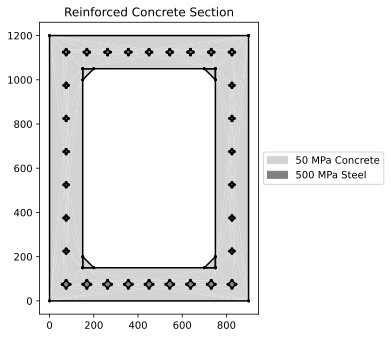

<AxesSubplot:title={'center':'Reinforced Concrete Section'}>

In [3]:
# construct box by subtracting an inner rectangle from an outer rectangle
outer = sp_ps.rectangular_section(d=1200, b=900, material=concrete)
inner = sp_ps.rectangular_section(d=900, b=600).align_center(align_to=outer)
box = outer - inner

# generate four chamfers
chamfer1 = (
    sp_ps.triangular_section(b=50, h=50, material=concrete)
    .align_to(other=inner, on="left", inner=True)
    .align_to(other=inner, on="bottom", inner=True)
)
chamfer2 = chamfer1.mirror_section(axis="y", mirror_point=(450, 600))
chamfer3 = chamfer1.mirror_section(axis="x", mirror_point=(450, 600))
chamfer4 = chamfer2.mirror_section(axis="x", mirror_point=(450, 600))

# add chamfers to box
geom = box + chamfer1 + chamfer2 + chamfer3 + chamfer4

# add bottom bars
geom = add_bar_rectangular_array(
    geometry=geom,
    area=620,
    material=steel,
    n_x=9,
    x_s=750 / 8,
    anchor=(75, 75),
)

# add top bars
geom = add_bar_rectangular_array(
    geometry=geom,
    area=310,
    material=steel,
    n_x=9,
    x_s=750 / 8,
    anchor=(75, 1125),
)

# add side bars
geom = add_bar_rectangular_array(
    geometry=geom,
    area=200,
    material=steel,
    n_x=2,
    x_s=750,
    n_y=6,
    y_s=150,
    anchor=(75, 225),
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()

## Calclulate Ultimate Properties ($N = 0$)
In this example we’ll calculate the ultimate bending capacity for sagging ($\theta = 0$), hogging ($\theta = \pi$) and weak axis bending ($\theta = \pi / 2$). To do this we call the ``ultimate_bending_capacity()`` method:

In [4]:
sag_res = conc_sec.ultimate_bending_capacity()
hog_res = conc_sec.ultimate_bending_capacity(theta=np.pi)
weak_res = conc_sec.ultimate_bending_capacity(theta=np.pi / 2)

## Displaying the Results  ($N = 0$)
We can print the ultimate bending results to the terminal by using the ``print_results()`` method.

In [5]:
sag_res.print_results()

           Ultimate Bending Results           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Property                    ┃        Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Bending Angle - theta       │ 0.000000e+00 │
│ Neutral Axis Depth - d_n    │ 1.182790e+02 │
│ Neutral Axis Parameter- k_u │ 1.051369e-01 │
│ Axial Force                 │ 2.110187e+01 │
│ Bending Capacity - m_x      │ 3.646746e+09 │
│ Bending Capacity - m_y      │ 0.000000e+00 │
│ Bending Capacity - m_u      │ 3.646746e+09 │
└─────────────────────────────┴──────────────┘

In [6]:
hog_res.print_results()

           Ultimate Bending Results            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property                    ┃         Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Bending Angle - theta       │  3.141593e+00 │
│ Neutral Axis Depth - d_n    │  8.104176e+01 │
│ Neutral Axis Parameter- k_u │  7.203712e-02 │
│ Axial Force                 │ -2.245517e+01 │
│ Bending Capacity - m_x      │ -2.191646e+09 │
│ Bending Capacity - m_y      │ -2.683992e-07 │
│ Bending Capacity - m_u      │  2.191646e+09 │
└─────────────────────────────┴───────────────┘

In [7]:
weak_res.print_results()

           Ultimate Bending Results            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property                    ┃         Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Bending Angle - theta       │  1.570796e+00 │
│ Neutral Axis Depth - d_n    │  1.012106e+02 │
│ Neutral Axis Parameter- k_u │  1.226796e-01 │
│ Axial Force                 │ -2.605872e+01 │
│ Bending Capacity - m_x      │  1.309674e-07 │
│ Bending Capacity - m_y      │ -2.138860e+09 │
│ Bending Capacity - m_u      │  2.138860e+09 │
└─────────────────────────────┴───────────────┘

We can also extract specific results from the ``UltimateBendingResults`` objects. Note that ``m_u`` refers to bending about the local axis, defined by $\theta$.

In [8]:
print(f"M_x+ = {sag_res.m_u / 1e6:.2f} kN.m")
print(f"M_x- = {hog_res.m_u / 1e6:.2f} kN.m")
print(f"M_y = {weak_res.m_u / 1e6:.2f} kN.m")

M_x+ = 3646.75 kN.m
M_x- = 2191.65 kN.m
M_y = 2138.86 kN.m


## Calclulate Ultimate Properties ($N = 5000$ kN)
Say our reinforced concrete cross-section has an axial compression of 5000 kN. We can also calculate the ultimate bending capacities given this axial load.

In [9]:
n = 5000e3
sag_axial_res = conc_sec.ultimate_bending_capacity(n=n)
hog_axial_res = conc_sec.ultimate_bending_capacity(theta=np.pi, n=n)
weak_axial_res = conc_sec.ultimate_bending_capacity(theta=np.pi / 2, n=n)

## Displaying the Results  ($N = 5000$ kN)


In [10]:
print(
    f"M_x+ = {sag_axial_res.m_u / 1e6:.2f} kN.m with N = {sag_axial_res.n / 1e3:.0f} kN"
)
print(
    f"M_x- = {hog_axial_res.m_u / 1e6:.2f} kN.m with N = {hog_axial_res.n / 1e3:.0f} kN"
)
print(
    f"M_y = {weak_axial_res.m_u / 1e6:.2f} kN.m with N = {weak_axial_res.n / 1e3:.0f} kN"
)

M_x+ = 5860.89 kN.m with N = 5000 kN
M_x- = 4548.79 kN.m with N = 5000 kN
M_y = 3688.49 kN.m with N = 5000 kN
